<img src="../../images/QISKit.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*VQE algorithm: application to optimization problems*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Antonio Mezzacapo, Jay Gambetta, Kristan Temme, Ramis Movassagh, Albert Frisch

## Introduction

Many problems in quantitative fields such as finance and engineering are optimization problems. Optimization problems lay at the core of complex decision-making and definition of strategies. 

Optimization (or combinatorial optimization) means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called cost function or objective function. 

**Typical optimization problems**

Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects 

We consider here two problems of practical interest in many fields, and show how they can mapped and solved on quantum computers.


### Weighted MaxCut

MaxCut is an NP-complete problem, with applications in clustering, network science, and statistical physics. To grasp how practical applications are mapped into given MaxCut instances, consider a system of many people that can interact and influence each other. Individuals can be represented by vertices of a graph, and their interactions seen as pairwise connections between vertices of the graph, or edges. With this representation in mind, it is easy to model typical marketing problems. For example, suppose that it is assumed that individuals will influence each other's buying decisions, and knowledge is given about how strong they will influence each other. The influence can be modeled by weights assigned on each edge of the graph. It is possible then to predict the outcome of a marketing strategy in which products are offered for free to some individuals, and then ask which is the optimal subset of individuals that should get the free products, in order to maximize revenues.

The formal definition of this problem is the following:

Consider an $n$-node non-directed graph *G = (V, E)* where *|V| = n* with edge weights $w_{ij}>0$, $w_{ij}=w_{ji}$, for $(i, j)\in E$. A cut is defined as a partition of the original set V into two subsets. The cost function to be optimized is in this case the sum of weights of edges connecting points in the two different subsets, *crossing* the cut. By assigning $x_i=0$ or $x_i=1$ to each node $i$, one tries to maximize the global profit function (here and in the following summations run over indices 0,1,...n-1)

$$C(\textbf{x}) = \sum_{i,j} w_{ij} x_i (1-x_j).$$

In our simple marketing model, $w_{ij}$ represents the probability that the person $j$ will buy a product after $i$ gets a free one. Note that the weights $w_{ij}$ can in principle be greater than $1$, corresponding to the case where the individual $j$ will buy more than one product. Maximizing the total buying probability corresponds to maximizing the total future revenues. In the case where the profit probability will be greater than the cost of the initial free samples, the strategy is a convenient one. An extension to this model has the nodes themselves carry weights, which can be regarded, in our marketing model, as the likelihood that a person granted with a free sample of the product will buy it again in the future. With this additional information in our model, the objective function to maximize becomes 

$$C(\textbf{x}) = \sum_{i,j} w_{ij} x_i (1-x_j)+\sum_i w_i x_i. $$
 
In order to find a solution to this problem on a quantum computer, one needs first to map it to an Ising Hamiltonian. This can be done with the assignment $x_i\rightarrow (1-Z_i)/2$, where $Z_i$ is the Pauli Z operator that has eigenvalues $\pm 1$. Doing this we find that 

$$C(\textbf{Z}) = \sum_{i<j} \frac{w_{ij}}{2} (1-Z_i)(1+Z_j) + \sum_i w_i (1-Z_i)/2 = -\frac{1}{2}\left( \sum_{i<j} w_{ij} Z_iZ_j +\sum_i w_i Z_i\right)+\mathrm{const},$$

where const = $\sum_{i<j}w_{ij}/2+\sum_i w_i/2 $. In other terms, the weighted MaxCut problem is equivalent to minimizing the Ising Hamiltonian 

$$ H = \sum_i w_i Z_i + \sum_{i<j} w_{ij} Z_iZ_j.$$

### Traveling Salesman Problem

In addition to being a notorious NP-complete problem that has drawn the attention of computer scientists and mathematicians for over two centuries, the Traveling Salesman Problem (TSP) has important bearings on finance and marketing, as its name suggests. Colloquially speaking, the traveling salesman is a person that goes from city to city to sell merchandise. The objective in this case is to find the shortest path that would enable the salesman to visit all the cities and return to its hometown, i.e. the city where he started traveling. By doing this, the salesman gets to maximize potential sales in the least amount of time. 

The problem derives its importance from its "hardness" and ubiquitous equivalence to other relevant combinatorial optimization problems that arise in practice.
 
The mathematical formulation with some early analysis was proposed by W.R. Hamilton in the early 19th century. Mathematically the problem is, as in the case of MaxCut, best abstracted in terms of graphs. The TSP on the nodes of a graph asks for the shortest *Hamiltonian cycle* that can be taken through each of the nodes. A Hamilton cycle is a closed path that uses every vertex of a graph once. The general solution is unknown and an algorithm that finds it efficiently (e.g., in polynomial time) is not expected to exist.

Find the shortest Hamiltonian cycle in a graph $G=(V,E)$ with $n=|V|$ nodes and distances, $w_{ij}$ (distance from vertex $i$ to vertex $j$). A Hamiltonian cycle is described by $N^2$ variables $x_{i,p}$, where $i$ represents the node and $p$ represents its order in a prospective cycle. The decision variable takes the value 1 if the solution occurs at node $i$ at time order $p$. We require that every node can only appear once in the cycle, and for each time a node has to occur. This amounts to the two constraints (here and in the following, whenever not specified, the summands run over 0,1,...N-1)

$$\sum_{i} x_{i,p} = 1 ~~\forall p$$
$$\sum_{p} x_{i,p} = 1 ~~\forall i.$$

For nodes in our prospective ordering, if $x_{i,p}$ and $x_{j,p+1}$ are both 1, then there should be an energy penalty if $(i,j) \notin E$ (not connected in the graph). The form of this penalty is 

$$\sum_{i,j\notin E}\sum_{p} x_{i,p}x_{j,p+1}>0,$$ 

where it is assumed the boundary condition of the Hamiltonian cycle $(p=N)\equiv (p=0)$. However, here it will be assumed a fully connected graph and not include this term. The distance that needs to be minimized is 

$$C(\textbf{x})=\sum_{i,j}w_{ij}\sum_{p} x_{i,p}x_{j,p+1}.$$

Putting this all together in a single objective function to be minimized, we get the following:

$$C(\textbf{x})=\sum_{i,j}w_{ij}\sum_{p} x_{i,p}x_{j,p+1}+ A\sum_p\left(1- \sum_i x_{i,p}\right)^2+A\sum_i\left(1- \sum_p x_{i,p}\right)^2,$$

where $A$ is a free parameter. One needs to ensure that $A$ is large enough so that these constraints are respected. One way to do this is to choose $A$ such that $A > \mathrm{max}(w_{ij})$. Furthermore, since the problem has the salesperson returning to the original city, it is possible, without loss of generality, to set $x_{00} = 1$, $x_{i0} = 0 \; \forall i\neq 0$, and $x_{0p} = 0 \;\forall p\neq 0$. Doing this, the objective functions becomes 

$$C(\textbf{x})=\sum_{i,j=1}^{N-1}w_{ij}\sum_{p=1}^{N-1} x_{i,p}x_{j,p+1}+\sum_{j=1}^{N-1}w_{0j} x_{j,1}+\sum_{i=1}^{N-1}w_{i0} x_{i,N-1}+ A\sum_{p=1}^{N-1}\left(1- \sum_{i=1}^{N-1} x_{i,p}\right)^2+A\sum_{i=1}^{N-1}\left(1- \sum_{p=1}^{N-1} x_{i,p}\right)^2.$$

Once again, it is easy to map the problem in this form to a quantum computer, and the solution will be found by minimizing a Ising Hamiltonian. 



### Approximate Universal Quantum Computing for Optimization Problems

There has been a considerable amount of interest in recent times about the use of quantum computers to find a solution to combinatorial problems. It is important to say that, given the classical nature of combinatorial problems, exponential speedup in using quantum computers compared to the best classical algorithms is not guaranteed. However, due to the nature and importance of the target problems, it is worth investigating heuristic approaches on a quantum computer that could indeed speed up some problem instances. Here we demonstrate an approach that is based on the Quantum Approximate Optimization Algorithm by Farhi, Goldstone, and Gutman (2014). We frame the algorithm in the context of *approximate quantum computing*, given its heuristic nature. 

The Algorithm works as follows:
1. Choose the $w_i$ and $w_{ij}$ in the target Ising problem. In principle, even higher powers of Z are allowed.
2. Choose the depth of the quantum circuit $m$. Note that the depth can be modified adaptively.
3. Choose a set of controls $\theta$ and make a trial function $|\psi(\boldsymbol\theta)\rangle$, built using a quantum circuit made of C-Phase gates and single-qubit Y rotations, parameterized by the components of $\boldsymbol\theta$. 
4. Evaluate $C(\boldsymbol\theta) = \langle\psi(\boldsymbol\theta)~|H|~\psi(\boldsymbol\theta)\rangle = \sum_i w_i \langle\psi(\boldsymbol\theta)~|Z_i|~\psi(\boldsymbol\theta)\rangle+ \sum_{i<j} w_{ij} \langle\psi(\boldsymbol\theta)~|Z_iZ_j|~\psi(\boldsymbol\theta)\rangle$ by sampling the outcome of the circuit in the Z-basis and adding the expectation values of the individual Ising terms together. In general, different control points around $\boldsymbol\theta$ have to be estimated, depending on the classical optimizer chosen. 
5. Use a classical optimizer to choose a new set of controls.
6. Continue until $C(\boldsymbol\theta)$ reaches a minimum, close enough to the solution $\boldsymbol\theta^*$.
7. Use the last $\boldsymbol\theta$ to generate a final set of samples from the distribution $|\langle z_i~|\psi(\boldsymbol\theta)\rangle|^2\;\forall i$ to obtain the answer.
    
It is our belief the difficulty of finding good heuristic algorithms will come down to the choice of an appropriate trial wavefunction. For example, one could consider a trial function whose entanglement best aligns with the target problem, or simply make the amount of entanglement a variable. In this tutorial, we will consider a simple trial function of the form

$$|\psi(\theta)\rangle  = [U_\mathrm{single}(\boldsymbol\theta) U_\mathrm{entangler}]^m |+\rangle$$

where $U_\mathrm{entangler}$ is a collection of C-Phase gates (fully entangling gates), and $U_\mathrm{single}(\theta) = \prod_{i=1}^n Y(\theta_{i})$, where $n$ is the number of qubits and $m$ is the depth of the quantum circuit. The motivation for this choice is that for these classical problems this choice allows us to search over the space of quantum states that have only real coefficients, still exploiting the entanglement to potentially converge faster to the solution.

One advantage of using this sampling method compared to adiabatic approaches is that the target Ising Hamiltonian does not have to be implemented directly on hardware, allowing this algorithm not to be limited to the connectivity of the device. Furthermore, higher-order terms in the cost function, such as $Z_iZ_jZ_k$, can also be sampled efficiently, whereas in adiabatic or annealing approaches they are generally impractical to deal with. 


References:
- A. Lucas, Frontiers in Physics 2, 5 (2014)
- E. Farhi, J. Goldstone, S. Gutmann e-print arXiv 1411.4028 (2014)
- D. Wecker, M. B. Hastings, M. Troyer Phys. Rev. A 94, 022309 (2016)
- E. Farhi, J. Goldstone, S. Gutmann, H. Neven e-print arXiv 1703.06199 (2017)

In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
from scipy import linalg as la
from itertools import permutations
from functools import partial
import networkx as nx

# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram

################# import Qconfig and set APIToken and API url and  prepare backends ############
try:
    import sys
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
except Exception as e:
    print(e)
    qx_config = {
        "APItoken":"YOUR_TOKEN_HERE",
        "url":"https://quantumexperience.ng.bluemix.net/api"}

#set api
from IBMQuantumExperience import IBMQuantumExperience
api = IBMQuantumExperience(token=qx_config['APItoken'], config={'url': qx_config['url']})

#prepare remote backends
from qiskit.backends import discover_local_backends, discover_remote_backends, get_backend_instance
remote_backends = discover_remote_backends(api) #we have to call this to connect to remote backends
local_backends = discover_local_backends()

print("Remote Backends:")
print(remote_backends)

print("Local Backends")
print(local_backends)
################### end of preparing backends ########################

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# import optimization tools
from qiskit.tools.apps.optimization import trial_circuit_ry, SPSA_optimization, SPSA_calibration
from qiskit.tools.apps.optimization import Energy_Estimate, make_Hamiltonian, eval_hamiltonian, group_paulis
from qiskit.tools.qi.pauli import Pauli

Remote Backends:
['ibmqx2', 'ibmqx5', 'ibmqx_hpc_qasm_simulator', 'ibmqx4', 'ibmqx_qasm_simulator']
Local Backends
['local_qasm_simulator', 'local_clifford_simulator', 'local_qiskit_simulator', 'local_sympy_qasm_simulator', 'local_sympy_unitary_simulator', 'local_unitary_simulator']


In [2]:
def obj_funct(Q_program, pauli_list, entangler_map, coupling_map, initial_layout, n, m, backend, shots, theta):
    """ Evaluate the objective function for a classical optimization problem.

    Q_program is an instance object of the class quantum program
    pauli_list defines the cost function as list of ising terms with weights
    theta are the control parameters 
    n is the number of qubits
    m is the depth of the trial function 
    backend is the type of backend to run it on
    shots is the number of shots to run. Taking shots = 1 only works in simulation
    and computes an exact average of the cost function on the quantum state
    """
    std_cost=0 # to add later
    circuits = ['trial_circuit'] 
   
    
    if shots==1:  
        Q_program.add_circuit('trial_circuit', trial_circuit_ry(n, m, theta, entangler_map, None, False))
        result = Q_program.execute(circuits, backend=backend, coupling_map=coupling_map, initial_layout=initial_layout, shots=shots)
        state = result.get_data('trial_circuit')['quantum_state']       
        cost=Energy_Estimate_Exact(state,pauli_list,True)
       
    else:
        Q_program.add_circuit('trial_circuit', trial_circuit_ry(n, m, theta, entangler_map, None, True))
        result = Q_program.execute(circuits, backend=backend, coupling_map=coupling_map, initial_layout=initial_layout, shots=shots)
        data = result.get_counts('trial_circuit')
        cost = Energy_Estimate(data, pauli_list)

       
    
    return cost, std_cost

## MaxCut on 4 Qubits

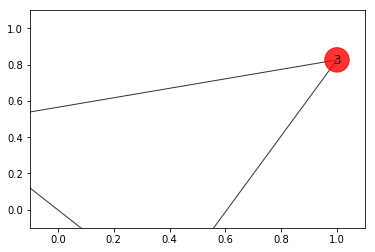

In [3]:
# Generating a graph of 4 nodes 

n =4 # Number of nodes in graph

G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[(0,1,1.0),(0,2,1.0),(0,3,1.0),(1,2,1.0),(2,3,1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
default_axes.set_xlim(-0.1,1.1)
default_axes.set_ylim(-0.1,1.1)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes)


In [4]:
# Computing the weight matrix from the random graph

w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 

In [5]:
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


### Brute force approach

Try all possible $2^n$ combinations. For $n = 4$, as in this example, one deals with only 16 combinations, but for n = 1000, one has 1.071509e+30 combinations, which is impractical to deal with by using a brute force approach. 

case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 3.0
case = [0, 1, 0, 0] cost = 2.0
case = [1, 1, 0, 0] cost = 3.0
case = [0, 0, 1, 0] cost = 3.0
case = [1, 0, 1, 0] cost = 4.0
case = [0, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 0] cost = 2.0
case = [0, 0, 0, 1] cost = 2.0
case = [1, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 1] cost = 4.0
case = [1, 1, 0, 1] cost = 3.0
case = [0, 0, 1, 1] cost = 3.0
case = [1, 0, 1, 1] cost = 2.0
case = [0, 1, 1, 1] cost = 3.0
case = [1, 1, 1, 1] cost = 0.0

Best solution = [1, 0, 1, 0] cost = 4.0


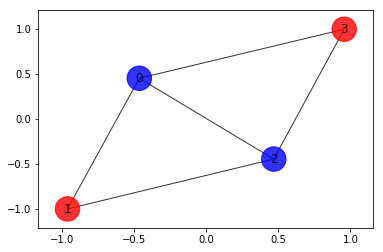

In [6]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x 
    
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = []
for i in range(n):
    if xbest_brute[i] == 0:
        colors.append('r')
    else:
        colors.append('b')
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8)
#plt.show()
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))    

### Mapping to the Ising problem

In [7]:
# Determining the constant shift and initialize a pauli_list that contains the ZZ Ising terms

pauli_list = []
cost_shift = 0
for i in range(n):
    for j in range(i):
        if w[i,j] != 0:
            cost_shift = cost_shift + w[i,j]
            wp = np.zeros(n)
            vp = np.zeros(n)
            vp[n-i-1] = 1
            vp[n-j-1] = 1
            pauli_list.append((w[i,j],Pauli(vp,wp)))
cost_shift

5.0

### Checking that the full Hamiltonian gives the right cost 

In [8]:
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector

H = make_Hamiltonian(pauli_list)
we, ve = la.eigh(H, eigvals=(0, 1))
exact = we[0]
exact_maxcut = -we[0]/2+cost_shift/2
print(exact_maxcut)
print(exact)
H = np.diag(H)

4.0
-3.0


### Running it on quantum computer

We run the optimization routine using a feedback loop with a quantum computer that uses trial functions built with Y single-qubit rotations, $U_\mathrm{single}(\theta) = \prod_{i=1}^n Y(\theta_{i})$, and entangler steps $U_\mathrm{entangler}$.

In [9]:
#Setting up a quantum program and connecting to the Quantum Experience API
Q_program = QuantumProgram()
# set the APIToken and API url
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url'])

/Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages/qiskit/_quantumprogram.py:707: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using the API object instead is recommended.
  "Using the API object instead is recommended.", DeprecationWarning)


In [10]:
# Testing Optimization on a quantum computer 

# Quantum circuit parameters:

# the entangler step is made of two-qubit gates between a control and target qubit, control: [target]
entangler_map = {0: [1], 1: [2], 2: [3]} 

# the coupling_maps gates allowed on the device
coupling_map = None
# the layout of the qubits 
initial_layout = None

# the backend used for the quantum computation
backend = 'local_qiskit_simulator' 
# Total number of trial steps used in the optimization
max_trials = 100; 
n = 4 # the number of qubits 
# Depth of the quantum circuit that prepares the trial state
m = 3     
# initial starting point for the control angles
initial_theta=np.random.randn(m*n)   
# number of shots for each evaluation of the cost function (shots=1 corresponds to perfect evaluation, 
# only available on the simulator)
shots = 1
# choose to plot the results of the optimizations every save_steps 
save_step = 1


""" ##########################      RUN    OPTIMIZATION      #######################
if shots == 1:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, entangler_map, coupling_map, initial_layout, n, m, backend, shots)
    initial_c=0.01
else:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, entangler_map, coupling_map, initial_layout, n, m, backend, shots)
    initial_c=0.1

target_update=2*np.pi*0.1
SPSA_parameters=SPSA_calibration(obj_funct_partial,initial_theta,initial_c,target_update,25)
print ('SPSA parameters = ' + str(SPSA_parameters))

best_distance_quantum, best_theta, cost_plus, cost_minus,_,_ = SPSA_optimization(obj_funct_partial, initial_theta, SPSA_parameters, max_trials, save_step)


"""

def cost_function(Q_program,H,n,m,entangler_map,shots,device,theta):
    
    return eval_hamiltonian(Q_program,H,trial_circuit_ry(n,m,theta,entangler_map,None,False),shots,device).real


initial_c=0.1
target_update=2*np.pi*0.1
save_step = 1

if shots !=1:
    H=group_paulis(pauli_list)
    
SPSA_params = SPSA_calibration(partial(cost_function,Q_program,H,n,m,entangler_map,
                                           shots,backend),initial_theta,initial_c,target_update,25)
            
best_distance_quantum, best_theta, cost_plus, cost_minus, _, _ = SPSA_optimization(partial(cost_function,Q_program,H,n,m,entangler_map,shots,backend),
                                                           initial_theta,SPSA_params,max_trials,save_step,1);


calibration step # 0 of 25
calibration step # 5 of 25
calibration step # 10 of 25
calibration step # 15 of 25
calibration step # 20 of 25
calibrated SPSA_parameters[0] is 0.5014369
objective function at theta+ for step # 0
-0.4788603
objective function at theta- for step # 0
-0.3289161
objective function at theta+ for step # 1
-0.7892094
objective function at theta- for step # 1
-0.7058515
objective function at theta+ for step # 2
-0.6996992
objective function at theta- for step # 2
-0.8722728
objective function at theta+ for step # 3
-1.0675992
objective function at theta- for step # 3
-1.0824478
objective function at theta+ for step # 4
-1.0964698
objective function at theta- for step # 4
-1.0611128
objective function at theta+ for step # 5
-1.0142178
objective function at theta- for step # 5
-1.1196158
objective function at theta+ for step # 6
-0.9088342
objective function at theta- for step # 6
-1.2739063
objective function at theta+ for step # 7
-1.2559982
objective function at th

objective function at theta+ for step # 75
-2.9245028
objective function at theta- for step # 75
-2.9648493
objective function at theta+ for step # 76
-2.9491613
objective function at theta- for step # 76
-2.9249991
objective function at theta+ for step # 77
-2.9396154
objective function at theta- for step # 77
-2.9356167
objective function at theta+ for step # 78
-2.9701968
objective function at theta- for step # 78
-2.9754385
objective function at theta+ for step # 79
-2.9356415
objective function at theta- for step # 79
-2.9481293
objective function at theta+ for step # 80
-2.9439330
objective function at theta- for step # 80
-2.9101381
objective function at theta+ for step # 81
-2.9371358
objective function at theta- for step # 81
-2.9361856
objective function at theta+ for step # 82
-2.9577696
objective function at theta- for step # 82
-2.9411989
objective function at theta+ for step # 83
-2.9705060
objective function at theta- for step # 83
-2.9503873
objective function at theta+

Text(0,0.5,'Cost')

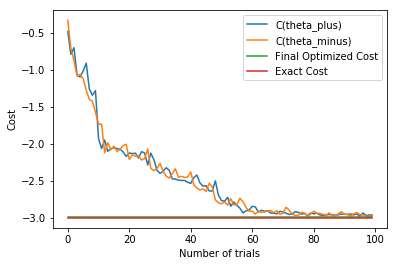

In [11]:
plt.plot(np.arange(0, max_trials,save_step),cost_plus,label='C(theta_plus)')
plt.plot(np.arange(0, max_trials,save_step),cost_minus,label='C(theta_minus)')
plt.plot(np.arange(0, max_trials,save_step),np.ones(max_trials//save_step)*best_distance_quantum, label='Final Optimized Cost')
plt.plot(np.arange(0, max_trials,save_step),np.ones(max_trials//save_step)*exact, label='Exact Cost')
plt.legend()
plt.xlabel('Number of trials')
plt.ylabel('Cost')

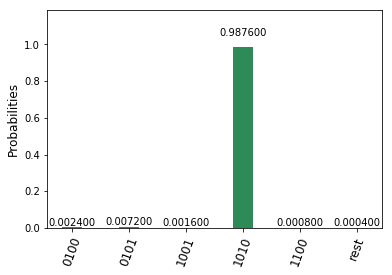

In [12]:
shots = 5000
circuits = ['final_circuit']   
Q_program.add_circuit('final_circuit', trial_circuit_ry(n, m, best_theta, entangler_map, None, True))
result = Q_program.execute(circuits, backend=backend, shots=shots, coupling_map=coupling_map, initial_layout=initial_layout)
data = result.get_counts('final_circuit')
plot_histogram(data,5)

Best solution from the quantum optimization is = [1. 0. 1. 0.] with cost = 4.0


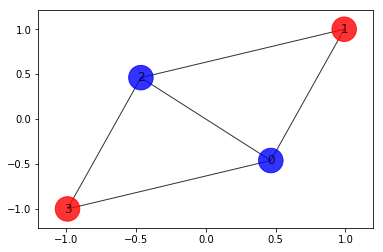

In [13]:
# Getting the solution and cost from the largest component of the optimal quantum state

max_value = max(data.values())  # maximum value
max_keys = [k for k, v in data.items() if v == max_value] # getting all keys containing the `maximum`

x_quantum=np.zeros(n)
for bit in range(n):
    if max_keys[0][bit]=='1':
        x_quantum[bit]=1
        
best_cost_quantum = 0
for i in range(n):
    for j in range(n):
        best_cost_quantum+= w[i,j]*x_quantum[i]*(1-x_quantum[j])
        
        
# Plot the quantum solution
colors = []
for i in range(n):
    if x_quantum[i] == 0:
        colors.append('r')
    else:
        colors.append('b')
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8)

print('Best solution from the quantum optimization is = ' +str(x_quantum)+ ' with cost = ' + str(best_cost_quantum))    

## Traveling Salesman for 4 cities (9 qubits)

For the second problem we consider the traveling salesman problem on N=4 cities. In this case there are (N-1)! two different combinations.

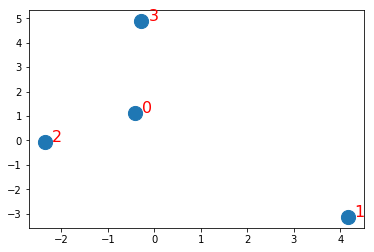

In [14]:
# Random choice of the cities/nodes 
N = 4
xc = (np.random.rand(N)-0.5)*10
yc = (np.random.rand(N)-0.5)*10

plt.scatter(xc, yc, s=200)
for i in range(len(xc)):
    plt.annotate(i,(xc[i]+0.15,yc[i]),size=16,color='r')
plt.show()

In [15]:
# Getting the distances 
w = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        w[i,j]= np.sqrt((xc[i]-xc[j])**2+(yc[i]-yc[j])**2)

### Brute force approach

The brute force approach consists of trying all the paths given by all the permutations of cities/nodes. The number of permutations of N cities/nodes is (N-1)!, which gives for 

N = 4 # paths = 6

N = 8 # paths = 5040

N = 16 # paths = 1.3076744e+12

order = (0, 1, 2, 3) Distance = 22.55520524719503
order = (0, 1, 3, 2) Distance = 23.03267031162882
order = (0, 2, 1, 3) Distance = 22.386438040024558
order = (0, 2, 3, 1) Distance = 23.032670311628824
order = (0, 3, 1, 2) Distance = 22.386438040024554
order = (0, 3, 2, 1) Distance = 22.555205247195033


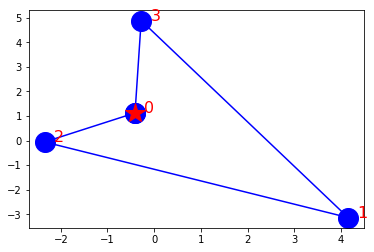

Best order from brute force = (0, 3, 1, 2) with total distance = 22.386438040024554


In [16]:
a=list(permutations(range(1,N)))
last_best_distance = 10000000
for i in a:
    distance = 0 
    pre_j = 0
    for j in i:
        distance = distance + w[j,pre_j]
        pre_j = j
    distance = distance + w[0,pre_j]
    order = (0,) + i
    if distance < last_best_distance:
        best_order = order
        last_best_distance = distance
    print('order = ' + str(order) + ' Distance = ' + str(distance))

best_distance_brute = last_best_distance
best_order_brute = best_order

plt.scatter(xc, yc)
xbest = np.array([xc[i] for i in best_order_brute])
xbest = np.append(xbest,xbest[0])
ybest = np.array([yc[i] for i in best_order_brute])
ybest = np.append(ybest,ybest[0])
plt.plot(xbest, ybest, 'b.-', ms = 40)
plt.plot(xc[0], yc[0], 'r*', ms = 20)
for i in range(len(xc)):
    plt.annotate(i,(xc[i]+0.2,yc[i]),size=16,color='r')
plt.show()
print('Best order from brute force = ' + str(best_order_brute) + ' with total distance = ' + str(best_distance_brute))

### Mapping to binary variables and simulated annealing 

Recall from the introduction that the cost function of the TSP mapped to binary variables is of the form:

$$C(\textbf{x})=\sum_{i,j=1}^{N-1}w_{ij}\sum_{p=1}^{N-1} x_{i,p}x_{j,p+1}+\sum_{j=1}^{N-1}w_{0j} x_{j,1}+\sum_{i=1}^{N-1}w_{i0} x_{i,N-1}+ A\sum_{p=1}^{N-1}\left(1- \sum_{i=1}^{N-1} x_{i,p}\right)^2+A\sum_{i=1}^{N-1}\left(1- \sum_{p=1}^{N-1} x_{i,p}\right)^2.$$

In [17]:
n=(N-1)**2 # number of qubits
A = np.max(w)*100 # A parameter of cost function

# takes the part of w matrix excluding the 0-th point, which is the starting one 
wsave = w[1:N,1:N]
# nearest-neighbor interaction matrix for the prospective cycle (p,p+1 interaction)
shift = np.zeros([N-1,N-1])
shift = la.toeplitz([0,1,0], [0,1,0])/2

# the first and last point of the TSP problem are fixed by initial and final conditions 
firststep = np.zeros([N-1])
firststep[0] = 1;
laststep = np.zeros([N-1])
laststep[N-2] = 1;

# The binary variables that define a path live in a tensor product space of position and ordering indices

# Q defines the interactions between variables 
Q = np.kron(shift,wsave) + np.kron(A*np.ones((N-1, N-1)), np.identity(N-1)) + np.kron(np.identity(N-1),A*np.ones((N-1, N-1)))
# G defines the contribution from the individual variables 
G = np.kron(firststep,w[0,1:N]) + np.kron(laststep,w[1:N,0]) - 4*A*np.kron(np.ones(N-1),np.ones(N-1))
# M is the constant offset 
M = 2*A*(N-1)

# Evaluates the cost distance from a binary representation of a path 
fun = lambda x: np.dot(np.around(x),np.dot(Q,np.around(x)))+np.dot(G,np.around(x))+M

def get_order_tsp(x):
    # This function takes in a TSP state, an array of (N-1)^2 binary variables, and returns the 
    # corresponding travelling path associated to it 
    order = [0]
    for p in range(N-1):
        for j in range(N-1):
            if x[(N-1)*p+j]==1:
                order.append(j+1)
    return order

def get_x_tsp(order):
    # This function takes in a traveling path and returns a TSP state, in the form of an array of (N-1)^2 
    # binary variables 
    x = np.zeros((len(order)-1)**2)
    for j in range(1,len(order)):
        p=order[j]
        x[(N-1)*(j-1)+(p-1)]=1
    return x


In [18]:
# Checking if the best results from the brute force approach are correct for the mapped system of binary variables

# Conversion from a path to a binary variable array
xopt_brute =get_x_tsp(best_order_brute)

print('Best path from brute force mapped to binary variables: \n')
print(xopt_brute)

flag=False
for i in range(100000):
    rd =  np.random.randint(2, size=n)
    if fun(rd) < (best_distance_brute-0.0001):
        print('\n A random solution is better than the brute-force one. The path measures')
        print(fun(rd))
        flag=True

if flag==False:
    print('\nCheck with 10^5 random solutions: the brute-force solution mapped to binary variables is correct.\n')
    
print('Shortest path evaluated with binary variables: ')
print(fun(xopt_brute))

Best path from brute force mapped to binary variables: 

[0. 0. 1. 1. 0. 0. 0. 1. 0.]

Check with 10^5 random solutions: the brute-force solution mapped to binary variables is correct.

Shortest path evaluated with binary variables: 
22.386438040025496


distance = 22.555205247195772 x_solution = [0 0 1 0 1 0 1 0 0], final temperature= 0.00045173345977048254


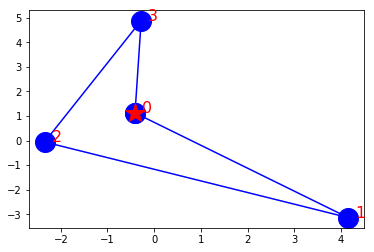

Best order from simulated annealing = [0, 3, 2, 1] with total distance = 22.555205247195772


In [19]:
# Optimization with simulated annealing 

initial_x = np.random.randint(2, size=n)

cost = fun(initial_x)
x = np.copy(initial_x)
alpha = 0.999
temp = 10
for j in range(10000):
    
    # pick a random index and flip the bit associated with it  
    flip=np.random.randint(len(x))
    new_x = np.copy(x)
    new_x[flip]=(x[flip]+1)%2
    
    # compute cost function with flipped bit 
    new_cost=fun(new_x)
    if np.exp(-(new_cost-cost)/temp) > np.random.rand():
        x = np.copy(new_x)
        cost = new_cost
    temp= temp*alpha
print('distance = ' + str(cost) + ' x_solution = ' + str(x) + ', final temperature= ' + str(temp))

best_order_sim_ann=get_order_tsp(x)

plt.scatter(xc, yc)
xbest = np.array([xc[i] for i in best_order_sim_ann])
xbest=np.append(xbest,xbest[0])
ybest = np.array([yc[i] for i in best_order_sim_ann])
ybest=np.append(ybest,ybest[0])
plt.plot(xbest, ybest, 'b.-', ms = 40)
plt.plot(xc[0], yc[0], 'r*', ms = 20)
for i in range(len(xc)):
    plt.annotate(i,(xc[i]+0.15,yc[i]),size=16,color='r')
plt.show()
print('Best order from simulated annealing = ' + str(best_order_sim_ann) + ' with total distance = ' + str(cost))

### Mapping to Z variables and simulation on a quantum computer

In [20]:
# Defining the new matrices in the Z-basis 

Iv=np.ones((N-1)**2)
Qz = (Q/4)
Gz =( -G/2-np.dot(Iv,Q/4)-np.dot(Q/4,Iv))
Mz = (M+np.dot(G/2,Iv)+np.dot(Iv,np.dot(Q/4,Iv)))

Mz = Mz + np.trace(Qz)
Qz = Qz - np.diag(np.diag(Qz))

# Recall the change of variables is 
# x = (1-z)/2
# z = -2x+1
z= -(2*xopt_brute)+Iv

for i in range(1000):
    rd =  1-2*np.random.randint(2, size=n)
    if np.dot(rd,np.dot(Qz,rd))+np.dot(Gz,rd)+Mz < (best_distance_brute-0.0001):
        print(np.dot(rd,np.dot(Qz,rd))+np.dot(Gz,rd)+Mz)

In [21]:
# Getting the Hamiltonian in the form of a list of Pauli terms 

pauli_list = []
for i in range(n):
    if Gz[i] != 0:
        wp = np.zeros(n)
        vp = np.zeros(n)
        vp[i] = 1
        pauli_list.append((Gz[i],Pauli(vp,wp)))
for i in range(n):
    for j in range(i):
        if Qz[i,j] != 0:
            wp = np.zeros(n)
            vp = np.zeros(n)
            vp[i] = 1
            vp[j] = 1
            pauli_list.append((2*Qz[i,j],Pauli(vp,wp)))
            
pauli_list.append((Mz,Pauli(np.zeros(n),np.zeros(n))))

In [22]:
# Making the Hamiltonian as a full matrix and finding its lowest eigenvalue

H = make_Hamiltonian(pauli_list)
we, v = la.eigh(H, eigvals=(0,0))
exact = we[0]
print(exact)
H=np.diag(H)

22.386438040024586


In [23]:
#Setting up a quantum program and connecting to the Quantum Experience API
Q_program = QuantumProgram()
# set the APIToken and API url
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url'])

/Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages/qiskit/_quantumprogram.py:707: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using the API object instead is recommended.
  "Using the API object instead is recommended.", DeprecationWarning)


In [24]:
# Optimization of the TSP using a quantum computer 

# Quantum circuit parameters

# the entangler step is made of two-qubit gates between a control and target qubit, control: [target]
coupling_map = None

# the coupling_maps gates allowed on the device
entangler_map = {0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5: [6], 6: [7], 7: [8]}
# the layout of the qubits 
initial_layout = None 

# the backend used for the quantum computation
backend = 'local_qiskit_simulator' 
# Total number of trial steps used in the optimization
max_trials = 1500; 
n = 9 # the number of qubits 
# Depth of the quantum circuit that prepares the trial state
m = 5     
# initial starting point for the control angles
initial_theta=np.random.randn(m*n)   
# number of shots for each evaluation of the cost function (shots=1 corresponds to perfect evaluation, 
# only available on the simulator)
shots = 1
# choose to plot the results of the optimizations every save_steps 
save_step = 1



""" ##########################      RUN OPTIMIZATION      #######################

if shots == 1:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, entangler_map, coupling_map, initial_layout, n, m, backend, shots)
    initial_c=0.01
else:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, entangler_map, coupling_map, initial_layout, n, m, backenddevice, shots)
    initial_c=0.1


target_update=2*np.pi*0.1
SPSA_parameters=SPSA_calibration(obj_funct_partial,initial_theta,initial_c,target_update,25)
print ('SPSA parameters = ' + str(SPSA_parameters))    
    
best_distance_quantum, best_theta, cost_plus, cost_minus,_,_ = SPSA_optimization(obj_funct_partial, initial_theta, SPSA_parameters, max_trials, save_step)
"""


def cost_function(Q_program,H,n,m,entangler_map,shots,device,theta):
    
    return eval_hamiltonian(Q_program,H,trial_circuit_ry(n,m,theta,entangler_map,None,False),shots,device).real


initial_c=0.1
target_update=2*np.pi*0.1
save_step = 1

if shots !=1:
    H=group_paulis(pauli_list)
    
SPSA_params = SPSA_calibration(partial(cost_function,Q_program,H,n,m,entangler_map,
                                           shots,backend),initial_theta,initial_c,target_update,25)
            
best_distance_quantum, best_theta, cost_plus, cost_minus, _, _ = SPSA_optimization(partial(cost_function,Q_program,H,n,m,entangler_map,shots,backend),
                                                           initial_theta,SPSA_params,max_trials,save_step,1);

calibration step # 0 of 25
calibration step # 5 of 25
calibration step # 10 of 25
calibration step # 15 of 25
calibration step # 20 of 25
calibrated SPSA_parameters[0] is 0.0002261
objective function at theta+ for step # 0
5330.4935436
objective function at theta- for step # 0
5555.1192465
objective function at theta+ for step # 1
5003.6580118
objective function at theta- for step # 1
5112.0415951
objective function at theta+ for step # 2
4790.4024445
objective function at theta- for step # 2
5180.2862184
objective function at theta+ for step # 3
4593.1305623
objective function at theta- for step # 3
4643.0154092
objective function at theta+ for step # 4
4490.1985567
objective function at theta- for step # 4
4685.2230426
objective function at theta+ for step # 5
4547.2212071
objective function at theta- for step # 5
4470.2133831
objective function at theta+ for step # 6
4660.9881728
objective function at theta- for step # 6
4311.7155733
objective function at theta+ for step # 7
4324.68

objective function at theta+ for step # 72
1364.9527205
objective function at theta- for step # 72
1534.6176343
objective function at theta+ for step # 73
1322.7708265
objective function at theta- for step # 73
1556.9912117
objective function at theta+ for step # 74
1272.8554750
objective function at theta- for step # 74
1543.6732871
objective function at theta+ for step # 75
1377.5791164
objective function at theta- for step # 75
1347.3810469
objective function at theta+ for step # 76
1366.5540485
objective function at theta- for step # 76
1354.0563344
objective function at theta+ for step # 77
1177.8115265
objective function at theta- for step # 77
1443.4086639
objective function at theta+ for step # 78
1309.8265415
objective function at theta- for step # 78
1352.3100500
objective function at theta+ for step # 79
1197.3182544
objective function at theta- for step # 79
1341.4482166
objective function at theta+ for step # 80
1265.6421707
objective function at theta- for step # 80
1356.

objective function at theta+ for step # 146
534.6574104
objective function at theta- for step # 146
716.3197185
objective function at theta+ for step # 147
645.8389256
objective function at theta- for step # 147
666.0805844
objective function at theta+ for step # 148
618.4874713
objective function at theta- for step # 148
696.1702433
objective function at theta+ for step # 149
650.5645142
objective function at theta- for step # 149
620.2161218
objective function at theta+ for step # 150
466.4240903
objective function at theta- for step # 150
766.7756049
objective function at theta+ for step # 151
648.2094932
objective function at theta- for step # 151
622.7207276
objective function at theta+ for step # 152
529.4439636
objective function at theta- for step # 152
643.6171965
objective function at theta+ for step # 153
508.3313763
objective function at theta- for step # 153
636.0907684
objective function at theta+ for step # 154
524.7127841
objective function at theta- for step # 154
553.

objective function at theta+ for step # 220
452.9252536
objective function at theta- for step # 220
389.0905425
objective function at theta+ for step # 221
432.0939011
objective function at theta- for step # 221
281.7112191
objective function at theta+ for step # 222
356.2006327
objective function at theta- for step # 222
369.8517630
objective function at theta+ for step # 223
375.6651005
objective function at theta- for step # 223
357.7916763
objective function at theta+ for step # 224
346.5234520
objective function at theta- for step # 224
333.9055689
objective function at theta+ for step # 225
371.4220586
objective function at theta- for step # 225
370.8149542
objective function at theta+ for step # 226
385.8821835
objective function at theta- for step # 226
409.0269510
objective function at theta+ for step # 227
382.6046361
objective function at theta- for step # 227
342.2986762
objective function at theta+ for step # 228
346.5830258
objective function at theta- for step # 228
361.

objective function at theta+ for step # 294
264.5625828
objective function at theta- for step # 294
274.6269929
objective function at theta+ for step # 295
265.0986714
objective function at theta- for step # 295
296.8031146
objective function at theta+ for step # 296
286.9961726
objective function at theta- for step # 296
288.0395123
objective function at theta+ for step # 297
312.3579226
objective function at theta- for step # 297
241.7915095
objective function at theta+ for step # 298
312.1042911
objective function at theta- for step # 298
282.3979727
objective function at theta+ for step # 299
294.5185150
objective function at theta- for step # 299
251.8234127
objective function at theta+ for step # 300
181.2859269
objective function at theta- for step # 300
285.4258910
objective function at theta+ for step # 301
303.9061296
objective function at theta- for step # 301
276.1377562
objective function at theta+ for step # 302
229.9553679
objective function at theta- for step # 302
250.

objective function at theta+ for step # 368
254.7594202
objective function at theta- for step # 368
237.8127895
objective function at theta+ for step # 369
207.0873380
objective function at theta- for step # 369
208.7925292
objective function at theta+ for step # 370
212.9836670
objective function at theta- for step # 370
195.3189420
objective function at theta+ for step # 371
234.1238181
objective function at theta- for step # 371
251.0655116
objective function at theta+ for step # 372
200.8673271
objective function at theta- for step # 372
227.9164282
objective function at theta+ for step # 373
241.9435071
objective function at theta- for step # 373
222.3744422
objective function at theta+ for step # 374
237.1667408
objective function at theta- for step # 374
197.0901790
objective function at theta+ for step # 375
264.1079194
objective function at theta- for step # 375
204.5203991
objective function at theta+ for step # 376
191.1947615
objective function at theta- for step # 376
229.

objective function at theta+ for step # 442
205.3359650
objective function at theta- for step # 442
237.2060679
objective function at theta+ for step # 443
204.9217697
objective function at theta- for step # 443
223.7079987
objective function at theta+ for step # 444
184.1814390
objective function at theta- for step # 444
199.6926731
objective function at theta+ for step # 445
223.6868590
objective function at theta- for step # 445
182.2697570
objective function at theta+ for step # 446
190.9497903
objective function at theta- for step # 446
144.3542487
objective function at theta+ for step # 447
201.1557686
objective function at theta- for step # 447
209.0539932
objective function at theta+ for step # 448
176.5976839
objective function at theta- for step # 448
207.9081513
objective function at theta+ for step # 449
200.4708820
objective function at theta- for step # 449
208.9195745
objective function at theta+ for step # 450
222.0599703
objective function at theta- for step # 450
154.

objective function at theta+ for step # 516
185.9629008
objective function at theta- for step # 516
186.9990217
objective function at theta+ for step # 517
155.9099826
objective function at theta- for step # 517
191.1225329
objective function at theta+ for step # 518
151.9473914
objective function at theta- for step # 518
146.3521799
objective function at theta+ for step # 519
208.0123751
objective function at theta- for step # 519
218.0812655
objective function at theta+ for step # 520
189.0696483
objective function at theta- for step # 520
147.0819362
objective function at theta+ for step # 521
191.6608779
objective function at theta- for step # 521
179.7522121
objective function at theta+ for step # 522
182.9401984
objective function at theta- for step # 522
185.0434383
objective function at theta+ for step # 523
192.6220819
objective function at theta- for step # 523
181.3056877
objective function at theta+ for step # 524
155.4270443
objective function at theta- for step # 524
148.

objective function at theta+ for step # 590
178.2405603
objective function at theta- for step # 590
147.0235465
objective function at theta+ for step # 591
197.6060859
objective function at theta- for step # 591
171.0224758
objective function at theta+ for step # 592
148.1024262
objective function at theta- for step # 592
160.5944510
objective function at theta+ for step # 593
160.3837629
objective function at theta- for step # 593
157.9994905
objective function at theta+ for step # 594
162.4638616
objective function at theta- for step # 594
173.8905083
objective function at theta+ for step # 595
134.3537837
objective function at theta- for step # 595
141.7702209
objective function at theta+ for step # 596
160.7351032
objective function at theta- for step # 596
144.6502406
objective function at theta+ for step # 597
183.8192086
objective function at theta- for step # 597
191.4931971
objective function at theta+ for step # 598
146.1557926
objective function at theta- for step # 598
146.

objective function at theta+ for step # 664
154.7688957
objective function at theta- for step # 664
168.4824534
objective function at theta+ for step # 665
173.5580041
objective function at theta- for step # 665
167.0118439
objective function at theta+ for step # 666
134.4349999
objective function at theta- for step # 666
142.0960917
objective function at theta+ for step # 667
122.2768662
objective function at theta- for step # 667
148.8805663
objective function at theta+ for step # 668
172.1110738
objective function at theta- for step # 668
193.7625817
objective function at theta+ for step # 669
169.5472188
objective function at theta- for step # 669
170.6518968
objective function at theta+ for step # 670
135.8033195
objective function at theta- for step # 670
151.6255252
objective function at theta+ for step # 671
136.9811314
objective function at theta- for step # 671
147.3711471
objective function at theta+ for step # 672
153.4878958
objective function at theta- for step # 672
157.

objective function at theta+ for step # 738
140.8074616
objective function at theta- for step # 738
164.1370068
objective function at theta+ for step # 739
160.2665968
objective function at theta- for step # 739
165.0398411
objective function at theta+ for step # 740
163.6947566
objective function at theta- for step # 740
136.2669566
objective function at theta+ for step # 741
152.6566191
objective function at theta- for step # 741
164.7641311
objective function at theta+ for step # 742
152.1388308
objective function at theta- for step # 742
159.5549525
objective function at theta+ for step # 743
144.9594480
objective function at theta- for step # 743
174.5685294
objective function at theta+ for step # 744
156.7818969
objective function at theta- for step # 744
148.8378506
objective function at theta+ for step # 745
145.7152911
objective function at theta- for step # 745
156.5065577
objective function at theta+ for step # 746
142.2379832
objective function at theta- for step # 746
148.

objective function at theta+ for step # 812
140.0903661
objective function at theta- for step # 812
120.7860437
objective function at theta+ for step # 813
118.7739899
objective function at theta- for step # 813
138.2251088
objective function at theta+ for step # 814
139.2179365
objective function at theta- for step # 814
123.2373443
objective function at theta+ for step # 815
156.7712011
objective function at theta- for step # 815
138.3057205
objective function at theta+ for step # 816
129.3716644
objective function at theta- for step # 816
132.4354173
objective function at theta+ for step # 817
152.4103045
objective function at theta- for step # 817
151.8749681
objective function at theta+ for step # 818
153.0683107
objective function at theta- for step # 818
145.5152965
objective function at theta+ for step # 819
151.5800973
objective function at theta- for step # 819
140.3767547
objective function at theta+ for step # 820
167.7281457
objective function at theta- for step # 820
160.

objective function at theta+ for step # 886
143.5989302
objective function at theta- for step # 886
117.8278541
objective function at theta+ for step # 887
146.2009169
objective function at theta- for step # 887
147.8654105
objective function at theta+ for step # 888
124.3689465
objective function at theta- for step # 888
149.9573085
objective function at theta+ for step # 889
117.1436438
objective function at theta- for step # 889
120.5613680
objective function at theta+ for step # 890
137.9010586
objective function at theta- for step # 890
126.9581547
objective function at theta+ for step # 891
138.0395930
objective function at theta- for step # 891
122.1701696
objective function at theta+ for step # 892
143.8840657
objective function at theta- for step # 892
124.5353674
objective function at theta+ for step # 893
155.5855899
objective function at theta- for step # 893
150.6010625
objective function at theta+ for step # 894
148.2284777
objective function at theta- for step # 894
131.

objective function at theta+ for step # 960
139.2266094
objective function at theta- for step # 960
151.5250796
objective function at theta+ for step # 961
127.3348995
objective function at theta- for step # 961
126.0005669
objective function at theta+ for step # 962
131.5064095
objective function at theta- for step # 962
126.2322349
objective function at theta+ for step # 963
108.9862931
objective function at theta- for step # 963
102.7739475
objective function at theta+ for step # 964
144.7012530
objective function at theta- for step # 964
157.5614240
objective function at theta+ for step # 965
145.5015075
objective function at theta- for step # 965
152.4118623
objective function at theta+ for step # 966
139.8960186
objective function at theta- for step # 966
152.3023011
objective function at theta+ for step # 967
158.6324899
objective function at theta- for step # 967
171.7359312
objective function at theta+ for step # 968
130.6802318
objective function at theta- for step # 968
110.

objective function at theta+ for step # 1033
111.3157368
objective function at theta- for step # 1033
119.4877845
objective function at theta+ for step # 1034
139.6299589
objective function at theta- for step # 1034
141.8671922
objective function at theta+ for step # 1035
95.7549014
objective function at theta- for step # 1035
112.0498838
objective function at theta+ for step # 1036
111.7550238
objective function at theta- for step # 1036
117.6031917
objective function at theta+ for step # 1037
127.3128894
objective function at theta- for step # 1037
120.4287948
objective function at theta+ for step # 1038
140.7651412
objective function at theta- for step # 1038
155.2057265
objective function at theta+ for step # 1039
113.1963504
objective function at theta- for step # 1039
104.9119012
objective function at theta+ for step # 1040
131.3182676
objective function at theta- for step # 1040
125.7003879
objective function at theta+ for step # 1041
118.4559760
objective function at theta- for

objective function at theta+ for step # 1105
112.7734062
objective function at theta- for step # 1105
119.3047514
objective function at theta+ for step # 1106
125.3064900
objective function at theta- for step # 1106
135.0793881
objective function at theta+ for step # 1107
141.7225155
objective function at theta- for step # 1107
144.9800185
objective function at theta+ for step # 1108
96.9646071
objective function at theta- for step # 1108
96.6678990
objective function at theta+ for step # 1109
131.0951550
objective function at theta- for step # 1109
143.8548060
objective function at theta+ for step # 1110
99.7839487
objective function at theta- for step # 1110
120.5537211
objective function at theta+ for step # 1111
160.6957642
objective function at theta- for step # 1111
157.1930400
objective function at theta+ for step # 1112
126.2702025
objective function at theta- for step # 1112
116.9265617
objective function at theta+ for step # 1113
140.9042251
objective function at theta- for s

objective function at theta+ for step # 1178
111.3244869
objective function at theta- for step # 1178
112.9299082
objective function at theta+ for step # 1179
110.5258390
objective function at theta- for step # 1179
117.8112500
objective function at theta+ for step # 1180
96.2010338
objective function at theta- for step # 1180
119.9265764
objective function at theta+ for step # 1181
130.7230108
objective function at theta- for step # 1181
127.5422117
objective function at theta+ for step # 1182
124.0277680
objective function at theta- for step # 1182
133.5815410
objective function at theta+ for step # 1183
130.3916681
objective function at theta- for step # 1183
129.5539198
objective function at theta+ for step # 1184
109.0071568
objective function at theta- for step # 1184
113.5950669
objective function at theta+ for step # 1185
116.4863389
objective function at theta- for step # 1185
89.1017667
objective function at theta+ for step # 1186
119.9862358
objective function at theta- for 

objective function at theta+ for step # 1250
114.8823986
objective function at theta- for step # 1250
118.8564096
objective function at theta+ for step # 1251
95.6152987
objective function at theta- for step # 1251
103.8424829
objective function at theta+ for step # 1252
131.9837524
objective function at theta- for step # 1252
141.6393307
objective function at theta+ for step # 1253
134.8567467
objective function at theta- for step # 1253
125.7202244
objective function at theta+ for step # 1254
129.6643428
objective function at theta- for step # 1254
115.9497579
objective function at theta+ for step # 1255
128.1040836
objective function at theta- for step # 1255
129.2984139
objective function at theta+ for step # 1256
112.5472674
objective function at theta- for step # 1256
121.9021106
objective function at theta+ for step # 1257
131.8598255
objective function at theta- for step # 1257
138.5235043
objective function at theta+ for step # 1258
75.3730607
objective function at theta- for 

objective function at theta+ for step # 1323
95.8241696
objective function at theta- for step # 1323
97.2747997
objective function at theta+ for step # 1324
133.5291945
objective function at theta- for step # 1324
137.0867403
objective function at theta+ for step # 1325
126.5570296
objective function at theta- for step # 1325
128.5064480
objective function at theta+ for step # 1326
117.4717628
objective function at theta- for step # 1326
125.3739978
objective function at theta+ for step # 1327
144.4867363
objective function at theta- for step # 1327
137.5391445
objective function at theta+ for step # 1328
124.4146978
objective function at theta- for step # 1328
124.1836659
objective function at theta+ for step # 1329
106.1287883
objective function at theta- for step # 1329
94.4022516
objective function at theta+ for step # 1330
132.5856685
objective function at theta- for step # 1330
135.1123376
objective function at theta+ for step # 1331
99.6709197
objective function at theta- for st

objective function at theta+ for step # 1396
130.4904492
objective function at theta- for step # 1396
122.5232680
objective function at theta+ for step # 1397
126.5710450
objective function at theta- for step # 1397
129.1552621
objective function at theta+ for step # 1398
130.1462118
objective function at theta- for step # 1398
131.5714478
objective function at theta+ for step # 1399
108.6767566
objective function at theta- for step # 1399
117.7479783
objective function at theta+ for step # 1400
119.6110659
objective function at theta- for step # 1400
127.6519390
objective function at theta+ for step # 1401
103.0746084
objective function at theta- for step # 1401
100.8554418
objective function at theta+ for step # 1402
122.6898738
objective function at theta- for step # 1402
133.3289936
objective function at theta+ for step # 1403
107.8095097
objective function at theta- for step # 1403
109.3235475
objective function at theta+ for step # 1404
109.4746377
objective function at theta- fo

objective function at theta+ for step # 1469
117.4393838
objective function at theta- for step # 1469
113.3858877
objective function at theta+ for step # 1470
102.1663090
objective function at theta- for step # 1470
87.5338758
objective function at theta+ for step # 1471
108.7339322
objective function at theta- for step # 1471
97.2409988
objective function at theta+ for step # 1472
153.6666997
objective function at theta- for step # 1472
148.4348191
objective function at theta+ for step # 1473
119.3143069
objective function at theta- for step # 1473
105.4433196
objective function at theta+ for step # 1474
125.1445813
objective function at theta- for step # 1474
125.1832552
objective function at theta+ for step # 1475
112.1168738
objective function at theta- for step # 1475
104.0457572
objective function at theta+ for step # 1476
136.8161506
objective function at theta- for step # 1476
133.7697335
objective function at theta+ for step # 1477
86.8965944
objective function at theta- for s

Text(0,0.5,'Cost')

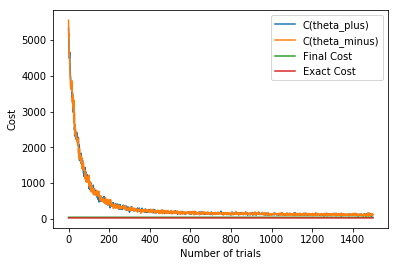

In [25]:
""" ##########################       PLOT RESULTS         #######################"""

plt.plot(np.arange(0, max_trials,save_step),cost_plus,label='C(theta_plus)')
plt.plot(np.arange(0, max_trials,save_step),cost_minus,label='C(theta_minus)')
plt.plot(np.arange(0, max_trials,save_step),(np.ones(max_trials//save_step)*best_distance_quantum), label='Final Cost')
plt.plot(np.arange(0, max_trials,save_step),np.ones(max_trials//save_step)*exact, label='Exact Cost')
plt.legend()
plt.xlabel('Number of trials')
plt.ylabel('Cost')

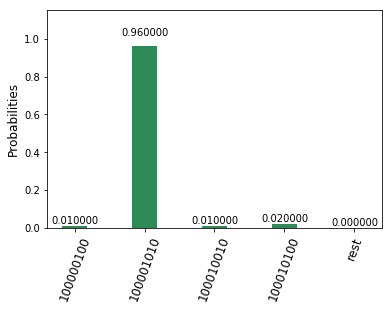

In [26]:
# Sampling from the quantum state generated with the optimal angles from the quantum optimization

shots = 100
circuits = ['final_circuit']   
Q_program.add_circuit('final_circuit', trial_circuit_ry(n, m, best_theta, entangler_map,None,True))
result = Q_program.execute(circuits, backend=backend, shots=shots, coupling_map=coupling_map, initial_layout=initial_layout)
data = result.get_counts('final_circuit')
plot_histogram(data,5)

In [27]:
# Getting path and total distance from the largest component of the quantum state

max_value = max(data.values())  # maximum value
max_keys = [k for k, v in data.items() if v == max_value] # getting all keys containing the `maximum`

x_quantum=np.zeros(n)
for bit in range(n):
    if max_keys[0][bit]=='1':
        x_quantum[bit]=1
    
quantum_order = get_order_tsp(list(map(int, x_quantum)))
best_distance_quantum_amp=fun(x_quantum)

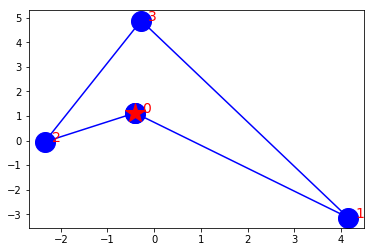

Best order from quantum optimization is = [0, 1, 3, 2] with total distance = 23.032670311627953


In [28]:
plt.scatter(xc, yc)
xbest = np.array([xc[i] for i in quantum_order])
xbest = np.append(xbest,xbest[0])
ybest = np.array([yc[i] for i in quantum_order])
ybest = np.append(ybest,ybest[0])
plt.plot(xbest, ybest, 'b.-', ms = 40)
plt.plot(xc[0], yc[0], 'r*', ms = 20)
for i in range(len(xc)):
    plt.annotate(i,(xc[i]+0.15,yc[i]),size=14,color='r')
plt.show()
print('Best order from quantum optimization is = ' + str(quantum_order) + ' with total distance = ' + str(best_distance_quantum_amp))